Crank-Nicholson Scheme

Discretized form:


\begin{eqnarray}
\frac{T^{n+1}_i - T^n_i}{\Delta t} = & \nonumber \\
\alpha \cdot \frac{1}{2} &\left( 
\frac{T^{n+1}_{i+1} - 2T^{n+1}_i + T^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{T^n_{i+1}-2T^n_i + T^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

Re-arranging so everything we don't know is on LHS:

$$-T_{i-1}^{n+1} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T_i^{n+1} - T_{i+1}^{n+1} = T_{i-1}^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} - 1 \right) T_i^n + T_{i+1}^n$$

For Dirichlet Boundary:

$$ 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T_1^{n+1} - T_2^{n+1} = T_0^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} -1 \right) T_1^n + T_2^n + T_0^{n+1}$$

And if we have Neumann BC:

$$ -T_{nx-3}^{n+1} + \left( 2 \frac{\Delta x^2}{\alpha \Delta t} +1 \right) T_{n_x-2}^{n+1} = T_{n_x-3}^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} -1 \right) T_{n_x-2}^n + T_{n_x-1}^n + q \Delta x$$



In [1]:
import numpy
from scipy.linalg import solve

In [2]:
def generateMatrix(N,sigma):
    d= 2* numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    
    d[-1,-1] = 1+2./sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d+ud+ld
    
    return A

In [15]:
def generateRHS(T,sigma):
    
    b = T[1:-1]*2*(1./sigma-1) + T[:-2] + T[2:]
    
    b[0] += T[0]
    
    return b

In [16]:
def CrankNicolson(T,A,nt,sigma):
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2]
        
    return T

In [17]:
L = 1
nx = 21
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

sigma = 0.5
dt = sigma * dx*dx/alpha
nt = 10

A = generateMatrix(nx, sigma)

In [18]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

In [19]:
T = CrankNicolson(Ti.copy(), A, nt, sigma)

from matplotlib import pyplot
%matplotlib inline


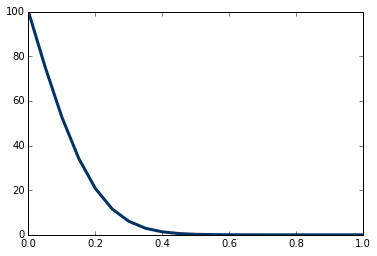

In [20]:
x = numpy.linspace(0,L,nx)
pyplot.plot(x,T, color='#003366', ls='-', lw =3);